# Введение в RL и пакет Gymnasium

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* https://gymnasium.farama.org/
* https://pypi.org/project/ufal.pybox2d/
* https://gymnasium.farama.org/tutorials/gymnasium_basics/environment_creation/
* https://gymnasium.farama.org/api/spaces/fundamental/
* https://gymnasium.farama.org/environments/toy_text/blackjack/

## Задачи для совместного разбора

1. Рассмотрите пример создания окружения `gymnasium` и основные этапы взаимодействия с этим окружением.
<img src="https://gymnasium.farama.org/_images/AE_loop.png" width="300"/>

In [ ]:
!pip install gymnasium

In [ ]:
!pip install ufal.pybox2d

In [ ]:
import gymnasium as gym

env = gym.make("LunarLander-v2", render_mode="human")
observation, info = env.reset(seed=42)

In [ ]:
# action = env.action_space.sample()  # this is where you would insert your policy
observation, reward, terminated, truncated, info = env.step(0)

In [ ]:
reward

1.1449803922348565

In [ ]:
def policy(env):
  return env.action_space.sample()

In [ ]:
done = False

while not done:
  action = policy(env)
  observation, reward, terminated, truncated, info = env.step(action)
  print(f'{action=} {reward=}')
  done = terminated or truncated

## Задачи для самостоятельного решения

In [ ]:
!pip install gymnasium

In [ ]:
!pip install ufal.pybox2d

In [ ]:
import gymnasium as gym
import numpy as np

<p class="task" id="1"></p>

1\. Создайте окружение `Blackjack-v1`. Сыграйте `N=10000` игр, выбирая действие случайным образом. Посчитайте и выведите на экран долю выигранных игр.

- [ ] Проверено на семинаре

In [ ]:
env = gym.make('Blackjack-v1', natural=False, sab=False)
observation, info = env.reset(seed=42)

In [ ]:
wins = 0
n = 1000

for i in range(n):
  observation, info = env.reset()
  done = False
  while not done:
    action = env.action_space.sample()
    observation, reward, terminated, truncated, info = env.step(action)
    done = terminated or truncated
  if reward == 1:
    wins += 1
print(f'wins: {wins}/{n} ({wins/n*100:.2f}% winrate)')

wins: 303/1000 (30.30% winrate)


<p class="task" id="2"></p>

2\. Создайте окружение `Blackjack-v1`. Предложите стратегию, которая позволит, в среднем, выигрывать чаще, чем случайный выбор действия. Реализуйте эту стратегию и сыграйте `N=10000` игр, выбирая действие согласно этой стратегии. Посчитайте и выведите на экран долю выигранных игр.

- [ ] Проверено на семинаре

In [ ]:
def policy(position):
  if position[0] >= 18:
    return 0
  else:
    return 1

In [ ]:
wins = 0
n = 1000

for i in range(n):
  observation, info = env.reset()
  done = False
  while not done:
    action = policy(observation)
    observation, reward, terminated, truncated, info = env.step(action)
    done = terminated or truncated
  if reward == 1:
    wins += 1
print(f'wins: {wins}/{n} ({wins/n*100:.2f}% winrate)')

wins: 403/1000 (40.30% winrate)


<p class="task" id="3"></p>

3\. Создайте окружение для игры в крестики-нолики, реализовав интерфейс `gym.Env`. Решение должно удовлетворять следующим условиям:
* для создания пространства состояний используется `spaces.Box`;
* для создания пространства действий используется `spaces.MultiDiscrete`;
* игра прекращается, если:
    - нет возможности сделать ход;
    - игрок пытается отметить уже выбранную ячейку.
* после каждого хода игрок получает награду:
    - 0, если игра не закончена;
    - 1, если игрок выиграл;
    - -1, если игрок проиграл.
* стратегию выбора действия для второго игрока (машины) определите самостоятельно.

Сыграйте одну игру, выбирая действия случайным образом. Выведите на экран состояние окружения после каждого хода и итоговую награду пользователя за сессию.

- [ ] Проверено на семинаре

In [ ]:
from IPython.core.interactiveshell import available_events
class TicTacToeEnv(gym.Env):
    def __init__(self):
      self.board = np.zeros((3, 3))
      self.current_player = 1
      self.winner = None
      self.observation_space = gym.spaces.Box(low=-1, high=1, shape=(3, 3), dtype=np.float32)
      self.action_space = gym.spaces.MultiDiscrete([3, 3])
      self.reset()

    def reset(self):
      self.board = np.zeros((3, 3))
      self.current_player = 1
      self.winner = None
      return self.board

    def bot_steps(self):
      available_steps = np.where(self.board == 0)
      steps = list((zip(available_steps[0], available_steps[1])))
      return steps[np.random.choice(len(steps))]

    def step(self, action):
      reward = 0
      done = False
      if self.current_player == -1:
        row, col = self.bot_steps()
      else:
        row, col = action
      if self.board[row][col] != 0:
        reward = -1
        done = True
      else:
        self.board[row][col] = self.current_player

        if self.check_winner():
          if env.current_player == 1:
            reward = 1
          else:
            reward = -1
          done = True
        elif self.check_draw():
          done = True
        self.current_player *= -1
      return self.board, reward, done

    def check_winner(self):
      if (abs(np.diag(self.board).sum()) == 3) or (abs(np.diag(self.board[:, ::-1]).sum()) == 3):
        return True
      h = (np.abs(self.board.sum(axis=1)) == 3).sum()
      v = (np.abs(self.board.sum(axis=0)) == 3).sum()
      if (h == 1) or (v == 1):
        return True
      return False

    def check_draw(self):
      return (self.board != 0).prod()

In [ ]:
env = TicTacToeEnv()
state = env.reset()
done = False

while not done:
  print('--------------------')
  print(f'PLAYER: {env.current_player}')
  action = env.action_space.sample()
  print(f'{action=}')
  state, reward, done = env.step(action)
  print(state)
  print(f'{done=}, {reward=}')

--------------------
PLAYER: 1
action=array([2, 1])
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 1. 0.]]
done=False, reward=0
--------------------
PLAYER: -1
action=array([1, 2])
[[ 0.  0.  0.]
 [ 0. -1.  0.]
 [ 0.  1.  0.]]
done=False, reward=0
--------------------
PLAYER: 1
action=array([2, 0])
[[ 0.  0.  0.]
 [ 0. -1.  0.]
 [ 1.  1.  0.]]
done=False, reward=0
--------------------
PLAYER: -1
action=array([0, 1])
[[ 0.  0.  0.]
 [ 0. -1. -1.]
 [ 1.  1.  0.]]
done=False, reward=0
--------------------
PLAYER: 1
action=array([2, 1])
[[ 0.  0.  0.]
 [ 0. -1. -1.]
 [ 1.  1.  0.]]
done=True, reward=-1


<p class="task" id="4"></p>

4\. Предложите стратегию (в виде алгоритма без использования методов машинного обучения), которая позволит, в среднем, выигрывать в крестики-нолики чаще, чем случайный выбор действия. Реализуйте эту стратегию и сыграйте игру, выбирая действия согласно этой стратегии. Выведите на экран состояние окружения после каждого хода и итоговую награду пользователя за сессию.

- [ ] Проверено на семинаре

In [ ]:
def policy_tic(state):
  if (state == 0).sum() == 9:
    return (0, 0)
  available_steps = np.where(state == 0)
  steps = list((zip(available_steps[0], available_steps[1])))
  return steps[np.random.choice(len(steps))]

In [ ]:
env = TicTacToeEnv()
state = env.reset()
done = False
while not done:
  print('--------------------')
  print(f'PLAYER: {env.current_player}')
  action = policy_tic(state)
  print(f'{action=}')
  state, reward, done = env.step(action)
  print(state)
  print(f'{done=}, {reward=}')

--------------------
PLAYER: 1
action=(0, 0)
[[1. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
done=False, reward=0
--------------------
PLAYER: -1
action=(2, 1)
[[ 1.  0.  0.]
 [ 0.  0.  0.]
 [ 0. -1.  0.]]
done=False, reward=0
--------------------
PLAYER: 1
action=(0, 1)
[[ 1.  1.  0.]
 [ 0.  0.  0.]
 [ 0. -1.  0.]]
done=False, reward=0
--------------------
PLAYER: -1
action=(1, 0)
[[ 1.  1.  0.]
 [-1.  0.  0.]
 [ 0. -1.  0.]]
done=False, reward=0
--------------------
PLAYER: 1
action=(1, 1)
[[ 1.  1.  0.]
 [-1.  1.  0.]
 [ 0. -1.  0.]]
done=False, reward=0
--------------------
PLAYER: -1
action=(2, 0)
[[ 1.  1.  0.]
 [-1.  1.  0.]
 [ 0. -1. -1.]]
done=False, reward=0
--------------------
PLAYER: 1
action=(0, 2)
[[ 1.  1.  1.]
 [-1.  1.  0.]
 [ 0. -1. -1.]]
done=True, reward=1


In [ ]:
env = TicTacToeEnv()
wins_random = 0
wins_policy = 0
for _ in range(1000):
  state = env.reset()
  done = False
  while not done:
    action = policy_tic(state)
    state, reward, done = env.step(action)
  if reward == 1:
    wins_policy += 1

  state = env.reset()
  done = False
  while not done:
    action = env.action_space.sample()
    state, reward, done = env.step(action)
  if reward == 1:
    wins_random += 1
print(f'{wins_policy=}/1000\n{wins_random=}/1000')

wins_policy=619/1000
wins_random=88/1000


<p class="task" id="5"></p>

5\. Создайте окружение `MountainCar-v0`. Проиграйте 10 эпизодов и сохраните на диск файл с записью каждого пятого эпизода. Для записи видео воспользуйтесь обёрткой `RecordVideo`. Вставьте скриншот, на котором видно, что файлы были созданы.

- [ ] Проверено на семинаре

In [1]:
!sudo apt-get install ffmpeg

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 9 not upgraded.


In [ ]:
env = gym.make('MountainCar-v0', render_mode='rgb_array')
video_kwargs = {
    "video_folder": "videos",
    "video_length": 200,
}
env = gym.wrappers.RecordVideo(env, **video_kwargs)

In [ ]:
for episode in range(10):
  observation, info = env.reset()
  done = False
  while not done:
    action = env.action_space.sample()
    observation, reward, done, info, _ = env.step(action)
  if episode % 5 == 0:
    env.render()

Moviepy - Building video /content/videos/rl-video-episode-0.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-0.mp4
Moviepy - Building video /content/videos/rl-video-episode-1.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-1.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-1.mp4
Moviepy - Building video /content/videos/rl-video-episode-8.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-8.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-8.mp4


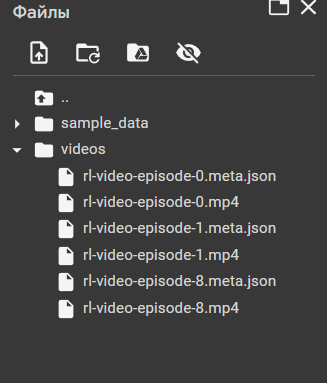

## Обратная связь
- [ ] Хочу получить обратную связь по решению